In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# get the MNIST digits dataset
mnist = fetch_openml('mnist_784')

import pandas as pd

In [3]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
# show example images
plt.figure(figsize=(25, 20))
for index, (image, label) in enumerate(zip(mnist.data[:25], mnist.target[:25])):
    plt.subplot(5, 5, index+1)
    plt.imshow(np.reshape(image, (28, 28)), cmap='gray')
    plt.title('Number: %s' % label, color='w', fontsize=20)
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Example Images', fontsize=25)
"""
plt.figure(figsize=(20, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(mnist.data[i], (28,28)), cmap='gray')
    plt.title('Number: {}'.format(mnist.target[i]))
"""

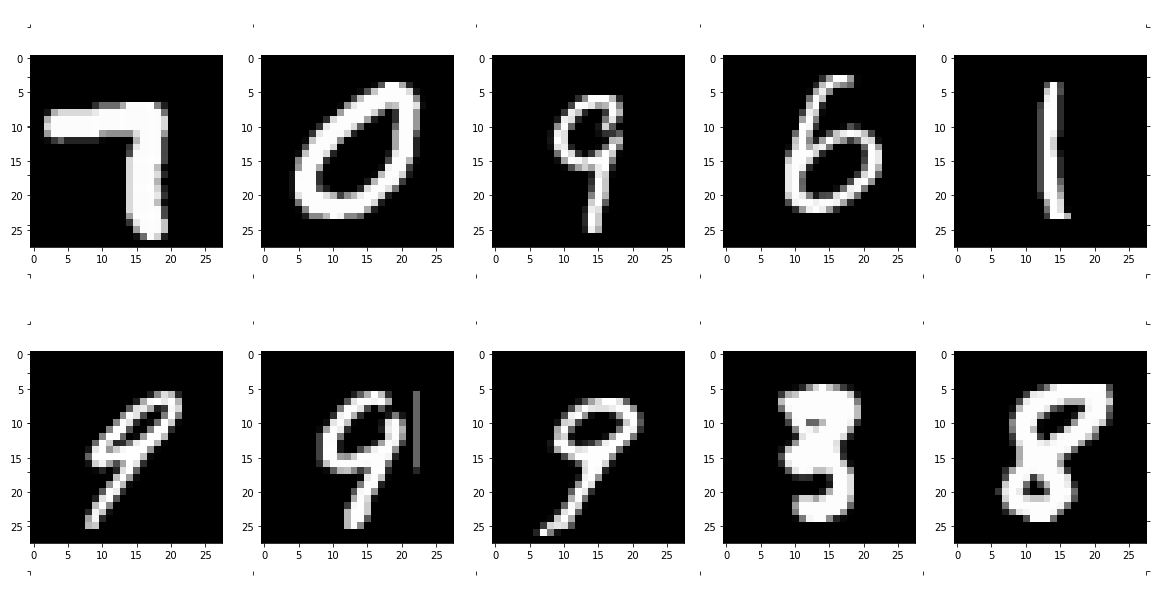

In [4]:
# divide data into training set and test set
# x: image, y: label
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=12345)
# x_train array of (56000, 784), image of 28 x 28
# x_test array of (14000, 784), image of 28 x 28

# show example images from training set and test set
# create 2 big, invisible subplots, each with a title
fig, big_axes = plt.subplots(figsize=(20, 10),
                            nrows=2, ncols=1, sharey=True)
suptitle = ['Training Set Example Images',
            'Test Set Example Images']
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(suptitle[row-1], fontsize=20, color='w')
    big_ax.tick_params(labelcolor=(1., 1., 1., 0.0), top='off',
                       bottom='off', left='off', right='off')
    big_ax._frameon = False
# add plots of example images
for i in range(5):
    ax1 = fig.add_subplot(2, 5, i+1)
    ax1.imshow(np.reshape(x_train[i], (28, 28)), cmap='gray')
    ax1.set_title('Number: {}'.format(y_train[i]), color='w', fontsize=20)
    ax2 = fig.add_subplot(2, 5, i+6)
    ax2.imshow(np.reshape(x_test[i], (28, 28)), cmap='gray')
    ax2.set_title('Number: {}'.format(y_test[i]), color='w', fontsize=20)
plt.show()

In [4]:
# LinearRegression Model
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(x_train, y_train)
predictions = mdl.predict(x_test)
score = mdl.score(x_test, y_test)

C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:94

In [5]:
# print(score)
# score is an np.array of 1 element
print('{:.2}'.format(score.item(0)))
# another way to calculate the score
print('{:.3}'.format(sum(predictions == y_test) / len(y_test)))

0.91
0.914


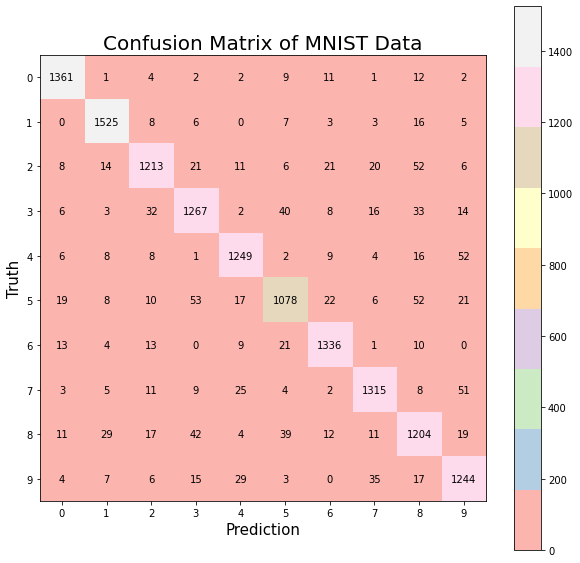

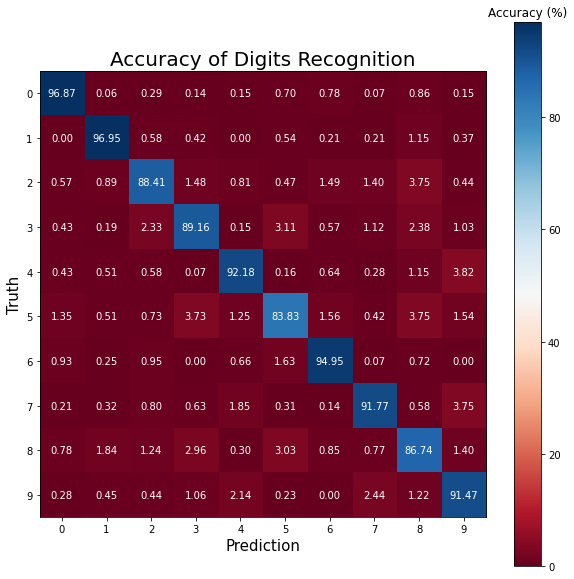

In [6]:
# get the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
# cm is an np.array of 10 x 10
# in row 0, how many times 0 (the truth) is recognized as
# 0, 1, ..., 9
# the sum of each row is the count for each number

plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix of MNIST Data', fontsize=20)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.colorbar()
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(cm[x][y], xy=(y, x), ha='center', va='center')
plt.show()

# convert confusion_matrix into percentage
cm_pct = cm.astype('float') /(cm.sum(axis=1)) * 100

# prediction accuracy
plt.figure(figsize=(10, 10))
plt.imshow(cm_pct, cmap='RdBu')
plt.title('Accuracy of Digits Recognition', fontsize=20)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Truth', fontsize=15)
cbar = plt.colorbar()
cbar.ax.set_title('Accuracy (%)')
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate('{:.2f}'.format(cm_pct.item(x, y)),
                     xy=(y, x), ha='center', va='center',
                     color='w')

In [5]:
# convert to the same type 
y_train = y_train.astype('int')
y_test = y_test.astype('int')

x_train = x_train.reshape(x_train.shape[0], *(28,28,1))/255
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))/255

In [8]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_cnn = Sequential()

# Convolutiom
model_cnn.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn.add(Flatten())

# Dense layers
model_cnn.add(Dense(32, activation='relu'))
#model_cnn.add(Dropout(0.5))

# model_cnn4.add(Dense(32, activation='relu'))
# model_cnn4.add(Dropout(0.5))

model_cnn.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [73]:
model_cnn.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 2s 38us/sample - loss: 1.6233 - accuracy: 0.4867 - val_loss: 0.7021 - val_accuracy: 0.7934
Epoch 2/500
56000/56000 [==============================] - 2s 31us/sample - loss: 0.5271 - accuracy: 0.8476 - val_loss: 0.4325 - val_accuracy: 0.8761
Epoch 3/500
56000/56000 [==============================] - 2s 30us/sample - loss: 0.3719 - accuracy: 0.8925 - val_loss: 0.3367 - val_accuracy: 0.9033
Epoch 4/500
56000/56000 [==============================] - 2s 31us/sample - loss: 0.3052 - accuracy: 0.9110 - val_loss: 0.2905 - val_accuracy: 0.9159
Epoch 5/500
56000/56000 [==============================] - 2s 30us/sample - loss: 0.2664 - accuracy: 0.9219 - val_loss: 0.2593 - val_accuracy: 0.9256
Epoch 6/500
56000/56000 [==============================] - 2s 31us/sample - loss: 0.2384 - accuracy: 0.9286 - val_loss: 0.2413 - val_accuracy: 0.9291
Epoch 7/500
56000/56000 [=========================

Test Accuracy: 0.966


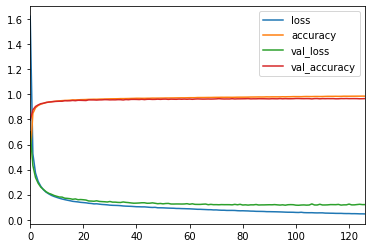

In [79]:
losses = pd.DataFrame(model_cnn.history.history)
losses.plot()
evaluation = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

In [80]:
model_cnn1 = Sequential()

# Convolutiom
model_cnn1.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn1.add(Flatten())

# Dense layers
model_cnn1.add(Dense(64, activation='relu'))
#model_cnn.add(Dropout(0.5))

# model_cnn4.add(Dense(32, activation='relu'))
# model_cnn4.add(Dropout(0.5))

model_cnn1.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model_cnn1.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 3s 57us/sample - loss: 1.1092 - accuracy: 0.6731 - val_loss: 0.5050 - val_accuracy: 0.8534
Epoch 2/500
56000/56000 [==============================] - 3s 49us/sample - loss: 0.3977 - accuracy: 0.8810 - val_loss: 0.3288 - val_accuracy: 0.9037
Epoch 3/500
56000/56000 [==============================] - 3s 52us/sample - loss: 0.2880 - accuracy: 0.9151 - val_loss: 0.2600 - val_accuracy: 0.9239
Epoch 4/500
56000/56000 [==============================] - 3s 52us/sample - loss: 0.2330 - accuracy: 0.9303 - val_loss: 0.2296 - val_accuracy: 0.9325
Epoch 5/500
56000/56000 [==============================] - 3s 51us/sample - loss: 0.2019 - accuracy: 0.9388 - val_loss: 0.1983 - val_accuracy: 0.9401
Epoch 6/500
56000/56000 [==============================] - 3s 50us/sample - loss: 0.1809 - accuracy: 0.9456 - val_loss: 0.1807 - val_accuracy: 0.9447
Epoch 7/500
56000/56000 [=========================

In [81]:
model_cnn2 = Sequential()

# Convolutiom
model_cnn2.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn2.add(Flatten())

# Dense layers
model_cnn2.add(Dense(32, activation='relu'))
model_cnn2.add(Dropout(0.5))

# model_cnn4.add(Dense(32, activation='relu'))
# model_cnn4.add(Dropout(0.5))

model_cnn2.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model_cnn2.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 2s 38us/sample - loss: 1.8789 - accuracy: 0.3578 - val_loss: 1.1514 - val_accuracy: 0.7365
Epoch 2/500
56000/56000 [==============================] - 2s 32us/sample - loss: 1.1797 - accuracy: 0.6109 - val_loss: 0.6333 - val_accuracy: 0.8471
Epoch 3/500
56000/56000 [==============================] - 2s 31us/sample - loss: 0.8791 - accuracy: 0.7107 - val_loss: 0.4453 - val_accuracy: 0.8772
Epoch 4/500
56000/56000 [==============================] - 2s 31us/sample - loss: 0.7414 - accuracy: 0.7614 - val_loss: 0.3746 - val_accuracy: 0.8933
Epoch 5/500
56000/56000 [==============================] - 2s 31us/sample - loss: 0.6552 - accuracy: 0.7859 - val_loss: 0.3365 - val_accuracy: 0.9018
Epoch 6/500
56000/56000 [==============================] - 2s 32us/sample - loss: 0.6069 - accuracy: 0.8053 - val_loss: 0.3070 - val_accuracy: 0.9069
Epoch 7/500
56000/56000 [=========================

Test Accuracy: 0.961


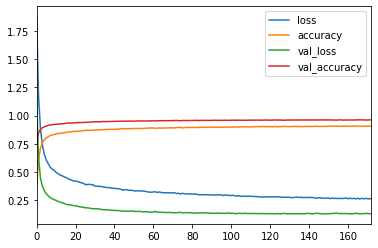

In [83]:
losses2 = pd.DataFrame(model_cnn2.history.history)
losses2.plot()
evaluation2 = model_cnn2.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: {:.3f}'.format(evaluation2[1]))

In [84]:
model_cnn3 = Sequential()

# Convolutiom
model_cnn3.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn3.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn3.add(Flatten())

# Dense layers
model_cnn3.add(Dense(64, activation='relu'))
model_cnn3.add(Dropout(0.5))

# model_cnn4.add(Dense(32, activation='relu'))
# model_cnn4.add(Dropout(0.5))

model_cnn3.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model_cnn3.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 3s 55us/sample - loss: 1.6014 - accuracy: 0.4889 - val_loss: 0.6951 - val_accuracy: 0.8309
Epoch 2/500
56000/56000 [==============================] - 3s 50us/sample - loss: 0.7657 - accuracy: 0.7665 - val_loss: 0.3706 - val_accuracy: 0.8941
Epoch 3/500
56000/56000 [==============================] - 3s 48us/sample - loss: 0.5428 - accuracy: 0.8355 - val_loss: 0.2895 - val_accuracy: 0.9129
Epoch 4/500
56000/56000 [==============================] - 3s 48us/sample - loss: 0.4461 - accuracy: 0.8648 - val_loss: 0.2478 - val_accuracy: 0.9269
Epoch 5/500
56000/56000 [==============================] - 3s 49us/sample - loss: 0.3982 - accuracy: 0.8796 - val_loss: 0.2269 - val_accuracy: 0.9310
Epoch 6/500
56000/56000 [==============================] - 3s 48us/sample - loss: 0.3653 - accuracy: 0.8916 - val_loss: 0.2075 - val_accuracy: 0.9364
Epoch 7/500
56000/56000 [=========================

In [85]:
model_cnn4 = Sequential()

# Convolutiom
model_cnn4.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn4.add(Flatten())

# Dense layers
model_cnn4.add(Dense(64, activation='relu'))
model_cnn4.add(Dropout(0.5))

model_cnn4.add(Dense(32, activation='relu'))
model_cnn4.add(Dropout(0.5))

model_cnn4.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model_cnn4.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 4s 67us/sample - loss: 1.8662 - accuracy: 0.3600 - val_loss: 0.9819 - val_accuracy: 0.7949
Epoch 2/500
56000/56000 [==============================] - 3s 50us/sample - loss: 1.1265 - accuracy: 0.6179 - val_loss: 0.5214 - val_accuracy: 0.8686
Epoch 3/500
56000/56000 [==============================] - 3s 50us/sample - loss: 0.8356 - accuracy: 0.7278 - val_loss: 0.3682 - val_accuracy: 0.9008
Epoch 4/500
56000/56000 [==============================] - 3s 51us/sample - loss: 0.6905 - accuracy: 0.7849 - val_loss: 0.3005 - val_accuracy: 0.9148
Epoch 5/500
56000/56000 [==============================] - 3s 49us/sample - loss: 0.6075 - accuracy: 0.8133 - val_loss: 0.2597 - val_accuracy: 0.9274
Epoch 6/500
56000/56000 [==============================] - 3s 50us/sample - loss: 0.5459 - accuracy: 0.8364 - val_loss: 0.2335 - val_accuracy: 0.9329
Epoch 7/500
56000/56000 [=========================

In [87]:
model_cnn5 = Sequential()

# Convolutiom
model_cnn5.add(Conv2D(64, 5, 5, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn5.add(Flatten())

# Dense layers
model_cnn5.add(Dense(64, activation='relu'))
model_cnn5.add(Dropout(0.5))

model_cnn5.add(Dense(32, activation='relu'))
model_cnn5.add(Dropout(0.5))

model_cnn5.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn5.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model_cnn5.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 2s 37us/sample - loss: 2.0350 - accuracy: 0.2867 - val_loss: 1.4791 - val_accuracy: 0.6234
Epoch 2/500
56000/56000 [==============================] - 2s 28us/sample - loss: 1.4900 - accuracy: 0.4876 - val_loss: 0.9362 - val_accuracy: 0.7051
Epoch 3/500
56000/56000 [==============================] - 2s 30us/sample - loss: 1.1639 - accuracy: 0.5955 - val_loss: 0.7290 - val_accuracy: 0.7845
Epoch 4/500
56000/56000 [==============================] - 2s 27us/sample - loss: 0.9954 - accuracy: 0.6598 - val_loss: 0.6316 - val_accuracy: 0.8146
Epoch 5/500
56000/56000 [==============================] - 2s 29us/sample - loss: 0.8942 - accuracy: 0.7011 - val_loss: 0.5585 - val_accuracy: 0.8354
Epoch 6/500
56000/56000 [==============================] - 2s 28us/sample - loss: 0.8191 - accuracy: 0.7326 - val_loss: 0.5101 - val_accuracy: 0.8489
Epoch 7/500
56000/56000 [=========================

In [93]:
dropout_rate = 0.5
model_cnn6 = Sequential()

# Convolutiom
model_cnn6.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# MaxPooling
model_cnn6.add(MaxPooling2D(pool_size=(2, 2)))
# AvgPooling
model_cnn6.add(AveragePooling2D(pool_size=(2, 2)))
# Dropout
model_cnn6.add(Dropout(dropout_rate))   

# Flattening
model_cnn6.add(Flatten())

# Dense layers
model_cnn6.add(Dense(64, activation='relu'))
model_cnn6.add(Dropout(dropout_rate))

model_cnn6.add(Dense(32, activation='relu'))
model_cnn6.add(Dropout(dropout_rate))

model_cnn6.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn6.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model_cnn6.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 4s 64us/sample - loss: 2.2459 - accuracy: 0.1540 - val_loss: 2.0457 - val_accuracy: 0.3454
Epoch 2/500
56000/56000 [==============================] - 3s 52us/sample - loss: 1.9795 - accuracy: 0.3036 - val_loss: 1.6194 - val_accuracy: 0.5496
Epoch 3/500
56000/56000 [==============================] - 3s 51us/sample - loss: 1.6809 - accuracy: 0.4074 - val_loss: 1.2507 - val_accuracy: 0.6429
Epoch 4/500
56000/56000 [==============================] - 3s 57us/sample - loss: 1.4801 - accuracy: 0.4765 - val_loss: 1.0641 - val_accuracy: 0.7043
Epoch 5/500
56000/56000 [==============================] - 3s 60us/sample - loss: 1.3550 - accuracy: 0.5228 - val_loss: 0.9465 - val_accuracy: 0.7324
Epoch 6/500
56000/56000 [==============================] - 3s 51us/sample - loss: 1.2647 - accuracy: 0.5593 - val_loss: 0.8609 - val_accuracy: 0.7596
Epoch 7/500
56000/56000 [=========================

In [11]:
do_rate1 = 0.5
do_rate2 = 0.5

model_cnn7 = Sequential()

# Convolutiom
model_cnn7.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# MaxPooling
model_cnn7.add(MaxPooling2D(pool_size=(2, 2)))
# # AvgPooling
# model_cnn7.add(AveragePooling2D(pool_size=(2, 2)))
Dropout
model_cnn7.add(Dropout(do_rate1))   

# Flattening
model_cnn7.add(Flatten())

# Dense layers
model_cnn7.add(Dense(64, activation='relu'))
model_cnn7.add(Dropout(do_rate2))

model_cnn7.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn7.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [10]:
model_cnn7.fit(x=x_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Train on 56000 samples, validate on 14000 samples
Epoch 1/500
56000/56000 [==============================] - 4s 68us/sample - loss: 1.5233 - accuracy: 0.4951 - val_loss: 0.6571 - val_accuracy: 0.8341
Epoch 2/500
56000/56000 [==============================] - 3s 56us/sample - loss: 0.7893 - accuracy: 0.7509 - val_loss: 0.3892 - val_accuracy: 0.8896
Epoch 3/500
56000/56000 [==============================] - 3s 58us/sample - loss: 0.6026 - accuracy: 0.8111 - val_loss: 0.3218 - val_accuracy: 0.9069
Epoch 4/500
56000/56000 [==============================] - 3s 57us/sample - loss: 0.5305 - accuracy: 0.8342 - val_loss: 0.2784 - val_accuracy: 0.9181
Epoch 5/500
56000/56000 [==============================] - 3s 61us/sample - loss: 0.4892 - accuracy: 0.8496 - val_loss: 0.2538 - val_accuracy: 0.9249
Epoch 6/500
56000/56000 [==============================] - 3s 59us/sample - loss: 0.4532 - accuracy: 0.8591 - val_loss: 0.2319 - val_accuracy: 0.9315
Epoch 7/500
56000/56000 [=========================

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_cnn7, param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)